<a href="https://colab.research.google.com/github/carmenscar/Mind_lab_data/blob/master/Analyzing_Airbnb_data_(Rome).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

## Analyzing Airbnb Data (Rome)

[Airbnb](https://www.airbnb.com.br/) has solidified its position as the primary influence in the current hotel industry, surprisingly without owning any hotel establishments of its own.

The revolutionary Airbnb platform connects travel enthusiasts seeking accommodation with hosts willing to rent out their properties, providing a unique approach to alternative lodging.

Since its inception a decade ago, by the end of 2018, this Startup had already accommodated over 300 million travelers from all corners of the globe, presenting a tangible challenge to traditional hotel chains.

A notable aspect of Airbnb is its initiative to share open information about various global metropolises. Through the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) portal, a substantial amount of data can be downloaded to develop projects and solutions in the field of Data Science.

In this notebook, we will analyze data related to the city of Rome and uncover insights that can be extracted from raw data.


## Data collection

All the information used in this study has been obtained through the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) platform, a reliable source that aggregates relevant data from various locations.

For this preliminary phase of exploratory analysis, we have chosen to download and examine the following file:

* `listings.csv` - Summary information and metrics for listings in Rome (suitable for visualizations).*
It's worth mentioning that the Inside Airbnb platform is constantly evolving, which could, at some point, lead to the unavailability of the exact dataset used in this study. This potential scenario could potentially lead to conflicts with our code.

With this in mind, let's proceed to the project.



In [6]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
#importing data
csv_url = "http://data.insideairbnb.com/italy/lazio/rome/2023-06-10/visualisations/listings.csv"

# csv into df
df = pd.read_csv(csv_url)

## Exploratory Data Analysis
In this session, we will raise questions to better understand the imported data.


**Metadata**

*`id`* - generated ID number to identify the property\
*`name`* - name of the advertised property\
*`host_id`* - ID number of the property owner (host)\
*`host_name`* - Host's name\
*`neighbourhood_group`* - this column does not contain any valid value\
*`neighbourhood`* - name of the neighborhood\
*`latitude`* - latitude coordinate of the property\
*`longitude`* - longitude coordinate of the property\
*`room_type`* - indicates the type of room that is offered\
*`price`* - price to rent the property\
*`minimum_nights`* - minimum number of nights for booking\
*`number_of_reviews`* - number of reviews the property has\
*`last_review`* - date of the last review\
*`reviews_per_month`* - number of reviews per month\
*`calculated_host_listings_count`* - number of properties from the same host\
*`availability_365`* - number of available days within 365 days\
*`number_of_reviews_ltm`*  - This column likely refers to the number of reviews received in the last 12 months, indicating recent review activity for each property.\
*`license`*  - The "license" column probably pertains to some form of legal license or permission related to the property. In the context of Airbnb, hosts may require special licenses or permits to operate short-term accommodations in certain locations. These licenses are often necessary to comply with local regulations and ensure property adherence to relevant laws.

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2737,Place to stay in Rome · ★4.80 · 1 bedroom · 1 ...,3047,Elif,NaN,VIII Appia Antica,41.871360,12.482150,Private room,50,7,7,2015-05-28,0.07,6,358,0,NaN
1,181189,Bed and breakfast in Rome · ★4.72 · 1 bedroom ...,868477,Luigi,NaN,I Centro Storico,41.909630,12.456030,Hotel room,100,3,147,2023-06-05,1.03,8,175,6,NaN
2,11834,Rental unit in Rome · ★4.80 · 1 bedroom · 1 be...,44552,Serena,NaN,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,191,2023-06-02,1.30,1,246,44,NaN
3,49240,Condo in Rome · ★4.69 · 2 bedrooms · 5 beds · ...,224479,Ermanno,NaN,I Centro Storico,41.897380,12.476000,Entire home/apt,294,2,70,2023-04-11,0.46,2,151,32,NaN
4,181747,Rental unit in Rome · ★4.56 · 2 bedrooms · 3 b...,871063,Lorenzo,NaN,I Centro Storico,41.901830,12.503970,Entire home/apt,228,2,85,2023-06-09,0.63,2,329,42,NaN


### **Q1. How many attributes (variables) and how many entries does our dataset have? What are the types of variables?**


Let's move forward and determine the number of entries in our dataset, as well as examine the data types of each column

In [11]:
# Data volumn
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# Variables Types
display(df.dtypes)

Entradas:	 26256
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. What is the percentage of missing values in the dataset?**

The quality of a dataset is closely tied to the amount of missing values present. It's important to grasp early on whether these null values are significant when compared to the total number of entries.

* It's noticeable that the `neighbourhood_group` column has 100% of its values missing, and the `license` column has 83% missing values.
* The variables `reviews_per_month` and `last_review` have null values in around 13% of the rows.
* The `host_name` variable has fewer than 0.1% of null values.

In [12]:
# checking nulls
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.839732
reviews_per_month                 0.131665
last_review                       0.131665
host_name                         0.000076
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. What is the distribution pattern of the variables**

To identify the distribution of the variables, Lets check the histograms.

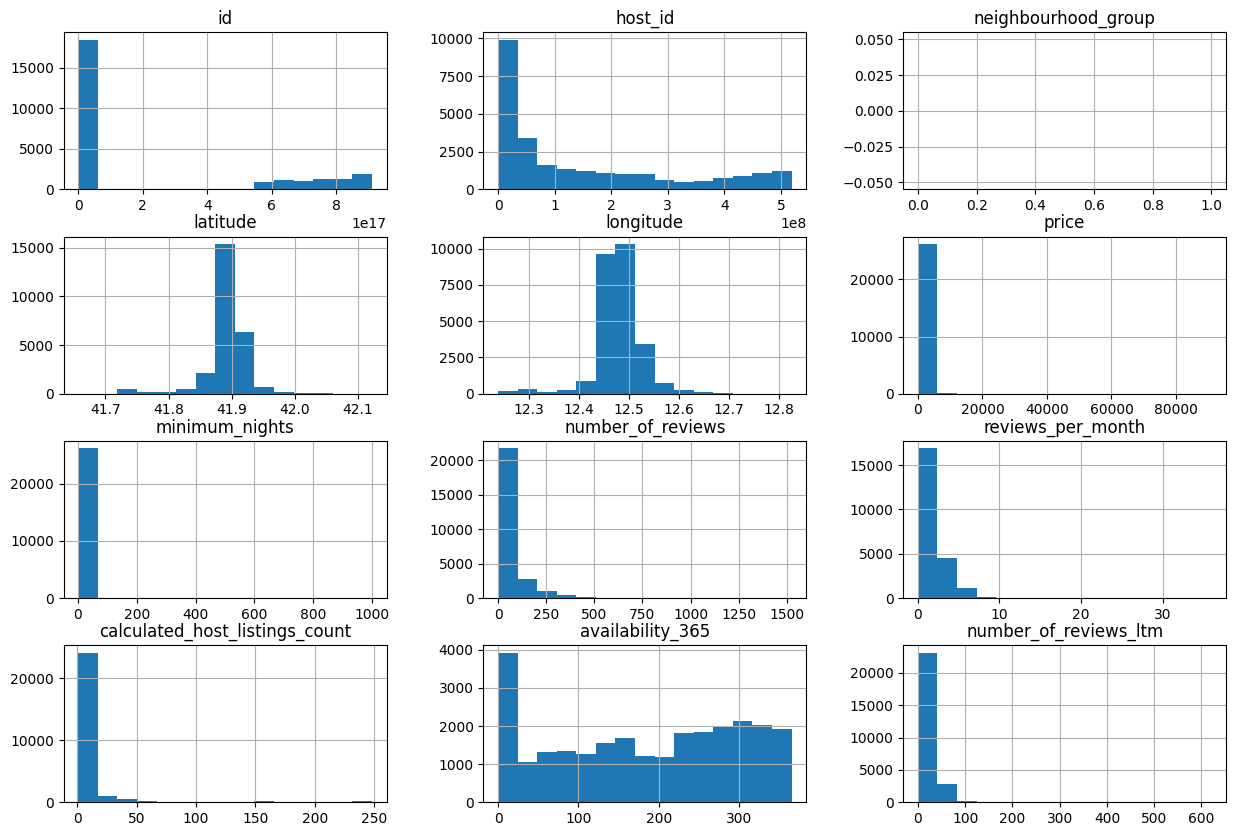

In [16]:
# plotting histogramns
df.hist(bins=15, figsize=(15,10));

### **Q4. There is *outliers*?**

From the histogram distribution, you can observe indications that *outliers* might be present. Take, for instance, the variables `price`, `minimum_nights`, and `calculated_host_listings_count`.

The values do not adhere to a standard distribution pattern, leading to a distortion in the graphical representation. To validate this, there are two efficient techniques for detecting *outliers*:

* Examining a statistical summary using the `describe()` method.
* Generating boxplots for the specific variable.

In [17]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,26256.000000,26256.000000,26256.000000,22799.000000,26256.000000,26256.000000
mean,230.828344,3.455629,53.935977,1.665726,8.712294,181.439328
std,1345.561287,18.371505,86.204971,1.672183,27.598178,116.643099
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,1.000000,3.000000,0.370000,1.000000,78.000000
50%,134.000000,2.000000,18.000000,1.110000,2.000000,191.000000
75%,211.000000,3.000000,67.000000,2.480000,6.000000,285.000000
max,90963.000000,999.000000,1525.000000,35.940000,248.000000,365.000000


Analyzing the statistical summary above, we can confirm certain hypotheses:

* The variable `price` has 75% of its values below 211, yet its maximum value is 90963.
* Similar observations can be made for the variables `minimum_nights` and `number_of_reviews`.




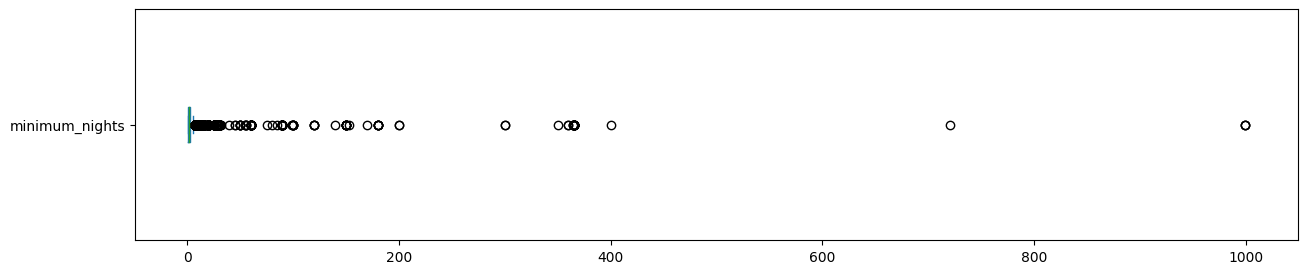

minimum_nights: Values up to 15 days:
475 entradas
1.8091%


In [23]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# amount of values up to 15 minimum nights
print("minimum_nights: Values up to 15 days:")
print("{} entradas".format(len(df[df.minimum_nights > 15])))
print("{:.4f}%".format((len(df[df.minimum_nights > 15]) / df.shape[0])*100))

#### Boxplot para price

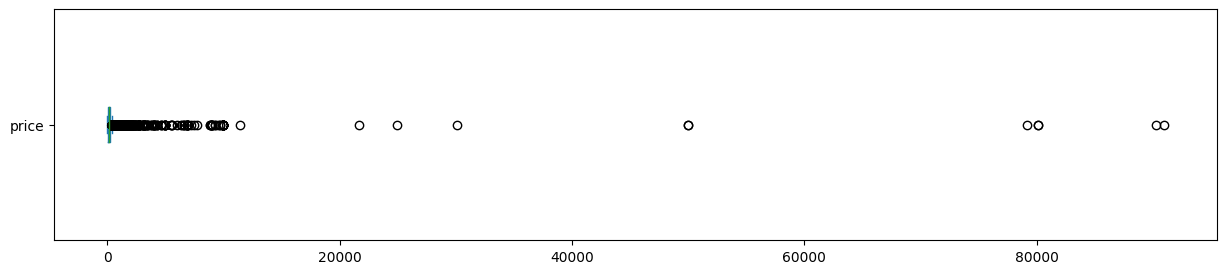


price: Up to 500
1351 entradas
5.1455%


In [22]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# amount of values up to 500 in price
print("\nprice: Up to 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histograms without *Outliers*

Now that we've identified outliers in the `price` and `minimum_nights` variables, let's proceed to clean the DataFrame of those outliers and then plot the histograms once again.


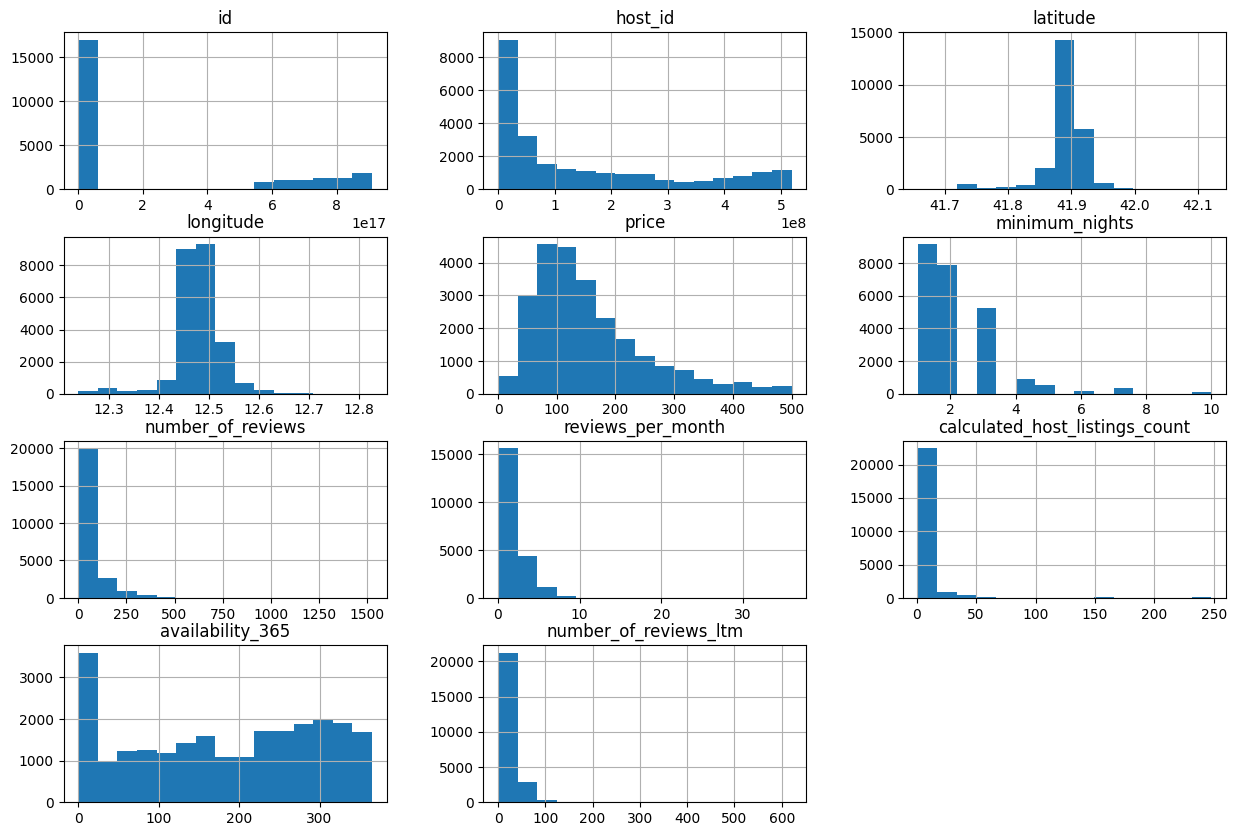

In [25]:
# removing *outliers*
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 10].index, axis=0, inplace=True)

# removing columns with massive nulls
df_clean.drop(['neighbourhood_group','license'], axis=1, inplace=True)

# ploting new histogramn
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Exploring Relationships: Variable Correlations**

Correlation examines the interrelation between two variables. In our scenario, we're investigating possible connections or resemblances between pairs of variables.

This connection can be measured, and the correlation coefficient serves to gauge its magnitude. To unveil potential correlations within the chosen variables, my approach involves:

* Constructing a correlation matrix
* Crafting a heatmap visualization from this matrix, utilizing the seaborn library

But let's keep in mind: correlation does not necessarily imply causality.




In [26]:
# Correlation Matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.085520,-0.047832,0.009471,0.131820,0.203339
minimum_nights,-0.085520,1.000000,0.030576,-0.094639,-0.078082,-0.077335
number_of_reviews,-0.047832,0.030576,1.000000,0.444380,-0.036644,-0.022185
reviews_per_month,0.009471,-0.094639,0.444380,1.000000,-0.002576,0.089517
calculated_host_listings_count,0.131820,-0.078082,-0.036644,-0.002576,1.000000,-0.029827
availability_365,0.203339,-0.077335,-0.022185,0.089517,-0.029827,1.000000


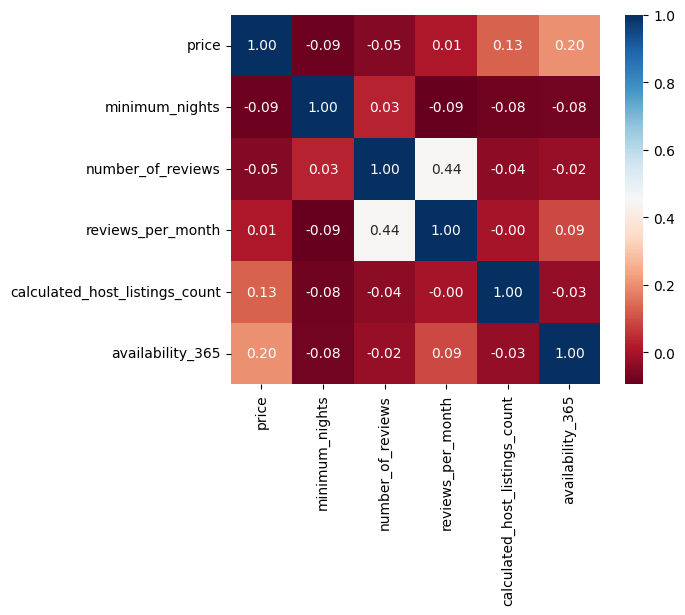

In [27]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. What is the most rented property type on Airbnb?**

The room_type variable column indicates the type of rental advertised on Airbnb. If you've used the site before, you're aware of options like entire apartments/houses, renting a single room, or even sharing a room with others.


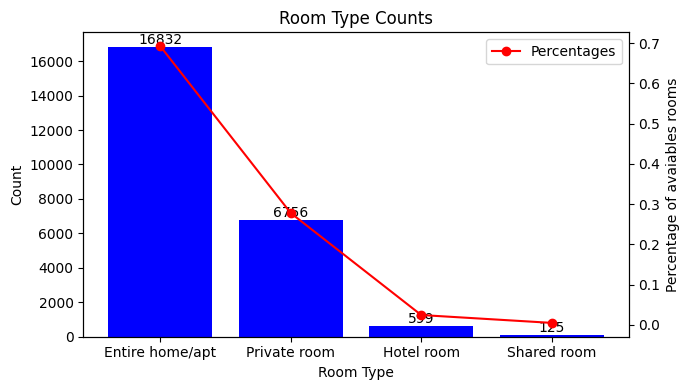

In [40]:
# Assuming you have already defined df_clean and it contains the data
room_type_counts = df_clean.room_type.value_counts()
room_type_percentages = room_type_counts / df_clean.shape[0]

# Create a bar and line plot
plt.figure(figsize=(7, 4))

# Bar plot with labels
bars = plt.bar(room_type_counts.index, room_type_counts, color='blue', label='Counts')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Counts')

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Line plot
plt.twinx()
plt.plot(room_type_percentages.index, room_type_percentages, color='red', marker='o', label='Percentages')
plt.ylabel('Percentage of avaiables rooms')
plt.legend()

plt.tight_layout()
plt.show()


### **Q6. Which is the most expensive locality in Rome ?**

One way to examine a variable in relation to another is by using `groupby()`. In this case, we aim to compare neighborhoods based on the rental price.

In [42]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
I Centro Storico              187.353188
XIII Aurelia                  140.193227
II Parioli/Nomentano          130.381517
XV Cassia/Flaminia            120.464720
XII Monte Verde               120.463651
VII San Giovanni/Cinecittà    113.797183
XIV Monte Mario               112.468560
VIII Appia Antica             109.346939
IX Eur                        103.689420
X Ostia/Acilia                103.370425
XI Arvalia/Portuense          100.993182
III Monte Sacro                98.469333
IV Tiburtina                   95.920000
V Prenestino/Centocelle        82.342105
VI Roma delle Torri            80.807692
Name: price, dtype: float64

From this analysis, we can observe a range of rental prices across different neighborhoods in Rome. The variations likely stem from factors such as location, amenities, historical significance, and proximity to attractions.


Given that property latitudes and longitudes are provided, it's possible to plot each point while considering the prices. To achieve this, you'll use x=`longitude` and y=`latitude` as coordinates for the points.

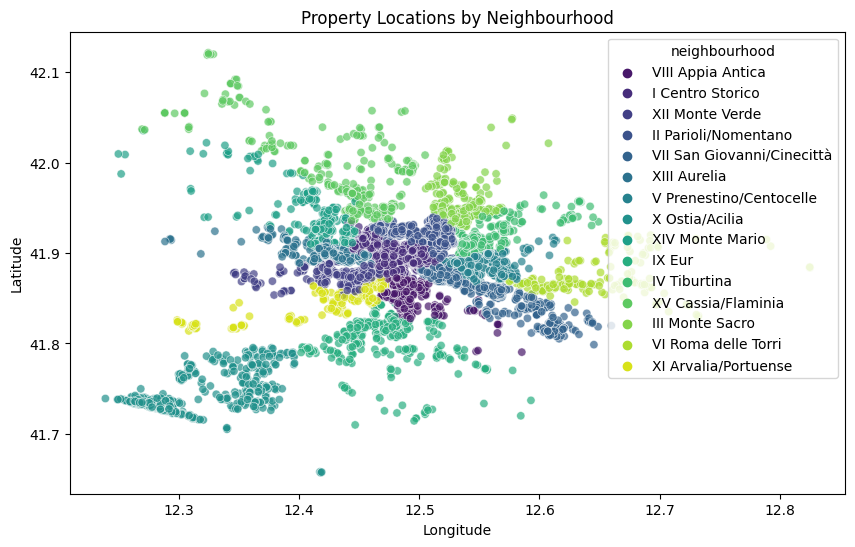

In [49]:


# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot using Seaborn
sns.scatterplot(data=df_clean, x='longitude', y='latitude', hue='neighbourhood', palette='viridis', alpha=0.7)

# Set plot title and labels
plt.title('Property Locations by Neighbourhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Turn off interactive mode (if needed)
plt.ioff()

# Display the plot
plt.show()


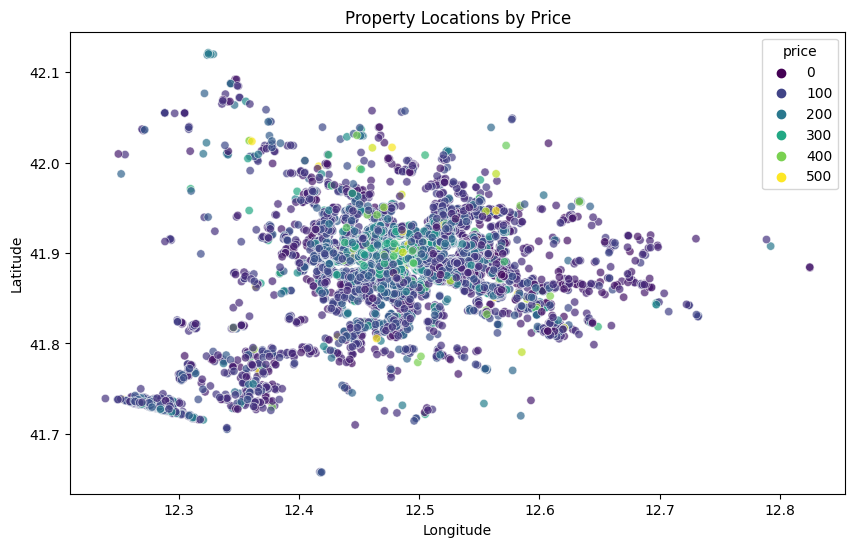

In [51]:


# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot using Seaborn
sns.scatterplot(data=df_clean, x='longitude', y='latitude', hue='price', palette='viridis', alpha=0.7)

# Set plot title and labels
plt.title('Property Locations by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Turn off interactive mode (if needed)
plt.ioff()

# Display the plot
plt.show()


## Conclusions
Only a superficial analysis was performed on the Airbnb database, but outliers have already been noticed in some of the variables.

We observed that the center of Rome tends to have more expensive properties.

Finally, it's important to remember that this dataset is a summarized version, suitable only for an initial approach. It is recommended that in a subsequent exploratory analysis, the complete dataset with 106 available attributes be used.

Autor: Carmen Scartezini